# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv("../data/liquor_store_sales.csv",sep=",")
data_backup = data.copy()

In [3]:
#data.isnull().sum()
#data.info()

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [4]:
pd.pivot_table(data,values=["RetailSales","RetailTransfers"],
               columns="ItemType").transpose()

,RetailSales,RetailTransfers
ItemType,,
BEER,12.770966,14.302858
DUNNAGE,0.000000,0.000000
KEGS,0.000000,0.000000
LIQUOR,10.911288,11.768018
NON-ALCOHOL,12.913965,14.424156
REF,5.516471,3.370980
STR_SUPPLIES,9.396038,33.912264
WINE,3.963231,4.308592


'\nSince "beer" and "dunnage" values are so high in barplot3, I have changed Y-axis to logarithmic scale\nto prevent plots with massive differences.\n'

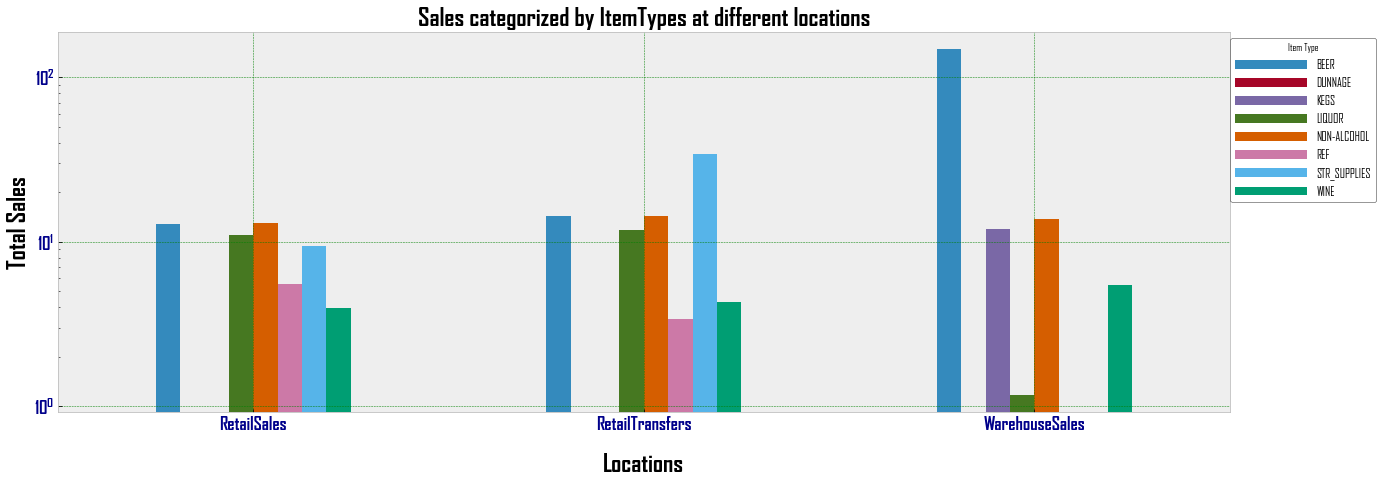

In [5]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"]=(21,7)
plt.rcParams["font.family"]="agency fb"
pd.pivot_table(data,values=["RetailSales","RetailTransfers","WarehouseSales"],
               columns="ItemType").plot(kind="bar")
plt.xticks(rotation=360,size=18,fontweight="bold",color="darkblue")
plt.yticks(size=18,fontweight="bold",color="darkblue")
plt.legend(handlelength=6,prop={'size':12},edgecolor="k",
          title="Item Type",bbox_to_anchor=(1.13, 1),facecolor="w")
plt.title("Sales categorized by ItemTypes at different locations",size=25,c="k",
         fontweight="bold")
plt.xlabel("Locations",size=25,c="k",fontweight="bold",labelpad=20)
plt.ylabel("Total Sales",size=25,c="k",fontweight="bold")
plt.yscale("log")
plt.grid(True,c="g")

#plt.savefig("OK1.svg")
'''
Since "beer" and "dunnage" values are so high in barplot3, I have changed Y-axis to logarithmic scale
to prevent plots with massive differences.
'''

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [6]:
data.head(3)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0


In [7]:
'''
Creating new column as TotalSales
'''

data["TotalSales"] = data["RetailSales"]+data["WarehouseSales"]
data.head(3)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,0.0


In [8]:
'''
Creating pivot table by Suppliers --> TotalSales, transposed + values_sorted + head(10)
'''

bar2 = pd.pivot_table(data,columns="Supplier",values="TotalSales").transpose().sort_values("TotalSales",ascending=False).head(10)
bar2

,TotalSales
Supplier,
CROWN IMPORTS,1505.043499
HEINEKEN USA,697.609363
MILLER BREWING COMPANY,471.043442
YUENGLING BREWERY,379.842335
FIFTH GENERATION INC,302.976000
ANHEUSER BUSCH INC,250.310467
SINGHA NORTH AMERICA INC,174.908000
PABST BREWING CO,153.823920
FLYING DOG BREWERY LLLP,146.382443


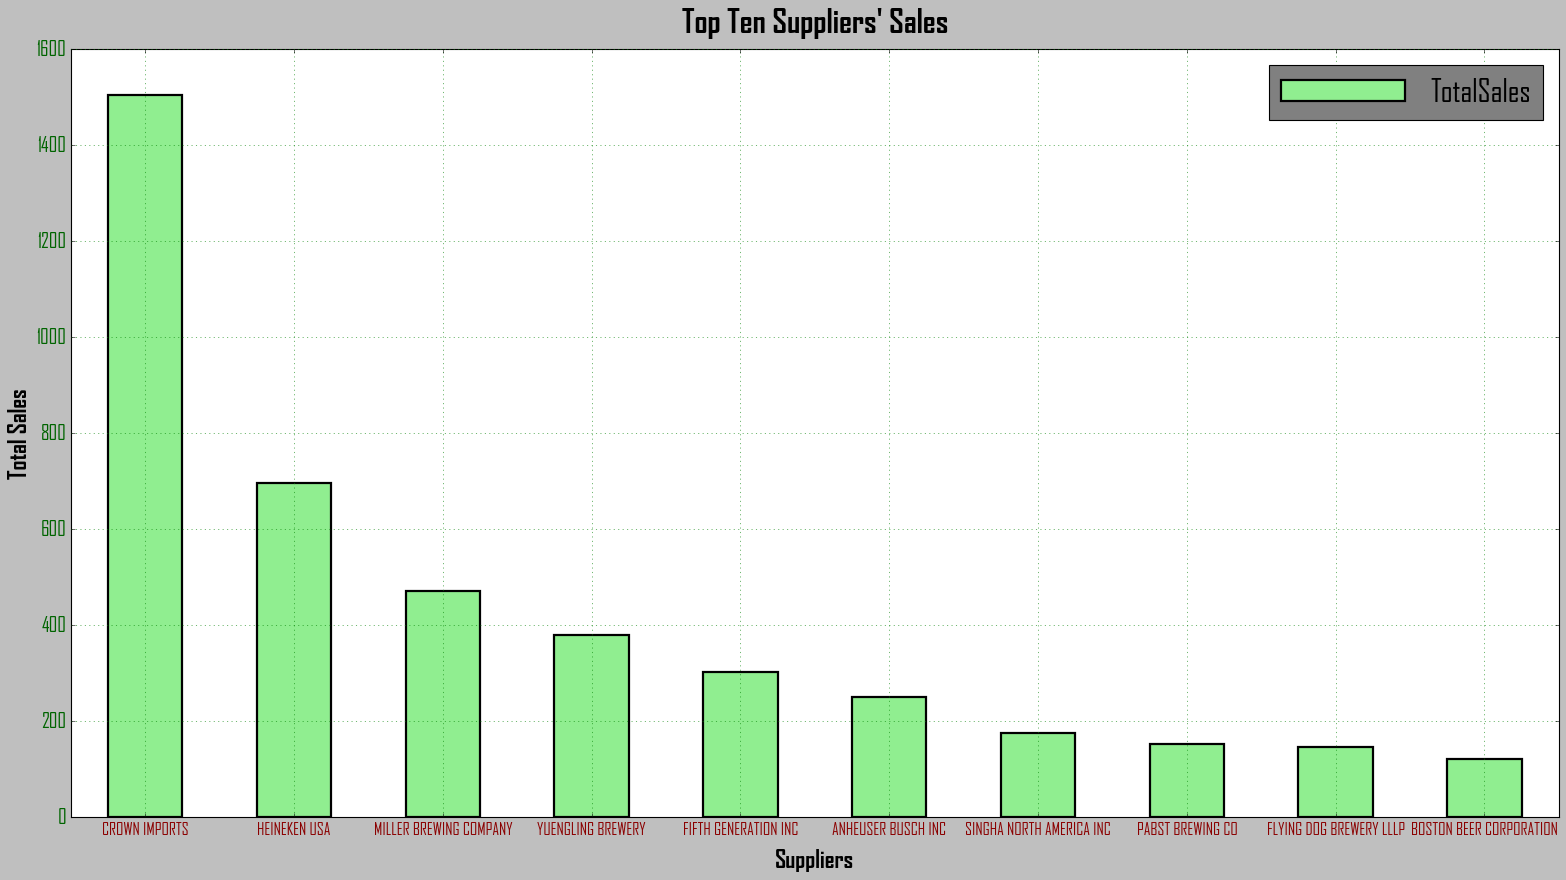

In [9]:
'''
Plotting bar chart based on above pivot table
'''

plt.style.use("classic")
plt.rcParams["figure.figsize"]=(24,12)
plt.rcParams["font.family"]="agency fb"

bar2.plot(kind="bar",label="Sales",color="lightgreen",edgecolor="k",linewidth=2)

plt.xticks(rotation=360,size=15,color="darkred")
plt.yticks(size=18,color="darkgreen")
plt.xlabel("Suppliers",size=22,c="k",fontweight="bold",labelpad=10)
plt.ylabel("Total Sales",size=22,c="k",fontweight="bold")

plt.title("Top Ten Suppliers' Sales",size=29,c="k",
         fontweight="bold",pad=15)
plt.legend(handlelength=4,prop={'size':28},edgecolor="k",
          facecolor="gray")
plt.grid(True,c="g")

#plt.savefig("OK1.svg")

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [10]:
pivot_monthly = pd.pivot_table(data,columns=["Month"],
               values=["RetailSales","RetailTransfers","WarehouseSales"]).T
pivot_monthly

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


<function xticks at 0x14024190>


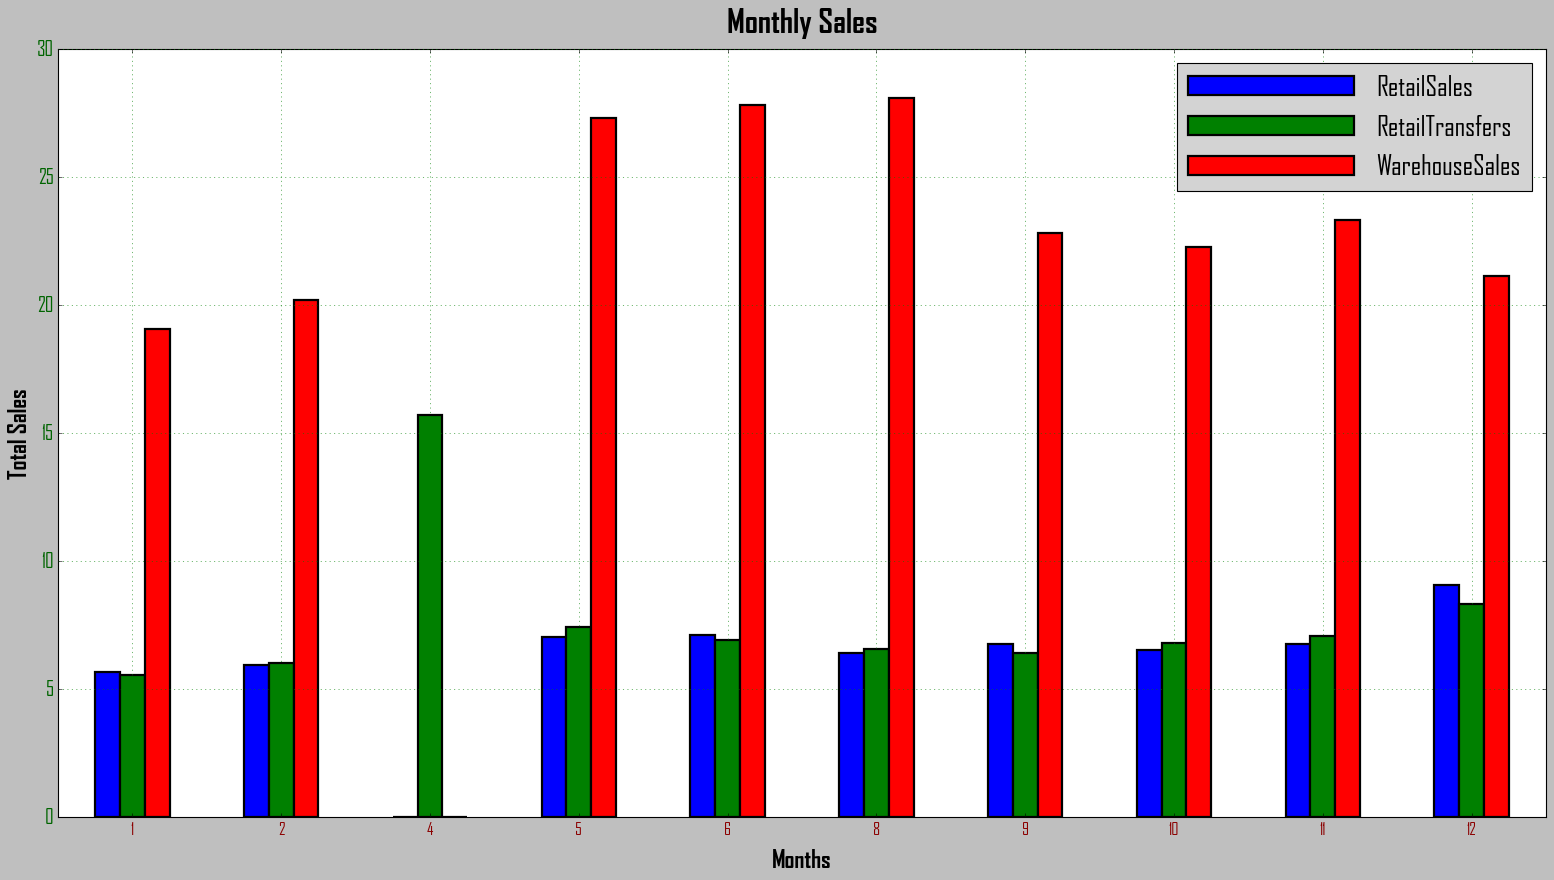

In [11]:
plt.style.use("classic")
plt.rcParams["figure.figsize"]=(24,12)
plt.rcParams["font.family"]="agency fb"
pivot_monthly.plot(kind="bar",edgecolor="k",linewidth=2)

plt.xticks(rotation=360,size=15,color="darkred")
plt.yticks(size=18,color="darkgreen")
plt.xlabel("Months",size=22,c="k",fontweight="bold",labelpad=10)
plt.ylabel("Total Sales",size=22,c="k",fontweight="bold")

plt.title("Monthly Sales",size=29,c="k",
         fontweight="bold",pad=15)


plt.legend(handlelength=6,prop={"size":25},edgecolor="k",facecolor="lightgray")
plt.grid(True,c="g")
plt.savefig("OK1.svg")

print(plt.xticks)

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [12]:
retail_sales_detail = pd.pivot_table(data,columns=["Month","Year"],values=["RetailSales"],
                                  index="ItemType").T

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

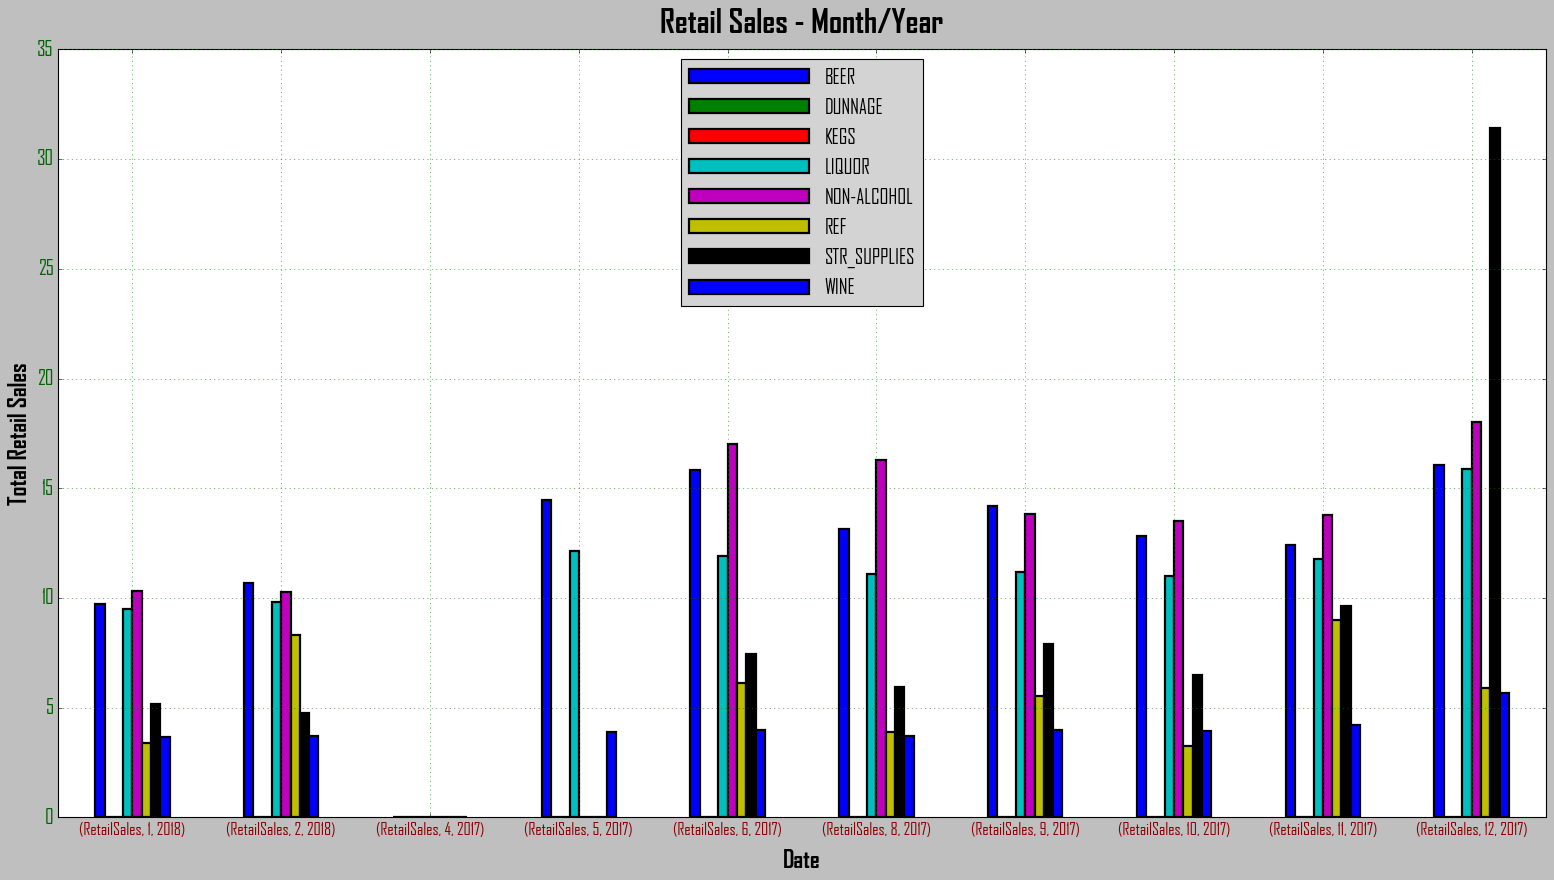

In [13]:
plt.style.use("classic")
plt.rcParams["figure.figsize"]=(24,12)
plt.rcParams["font.family"]="agency fb"
retail_sales_detail.plot(kind="bar",edgecolor="k",linewidth=2)

plt.xticks(rotation=360,size=15,color="darkred")
plt.yticks(size=18,color="darkgreen")
plt.xlabel("Date",size=22,c="k",fontweight="bold",labelpad=10)
plt.ylabel("Total Retail Sales",size=22,c="k",fontweight="bold")

plt.title("Retail Sales - Month/Year",size=29,c="k",
         fontweight="bold",pad=15)


plt.legend(handlelength=6,prop={"size":18},edgecolor="k",facecolor="lightgray",loc="upper center")
plt.grid(True,c="g")
plt.savefig("OK1.svg")

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

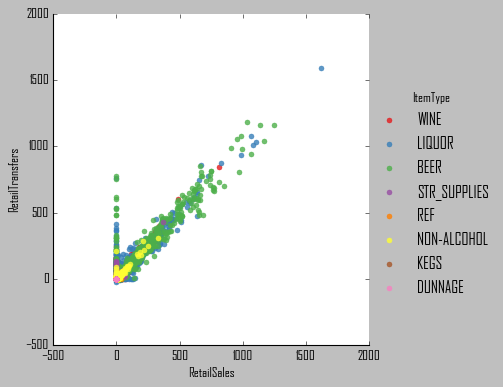

In [14]:
sns.lmplot(data=data,x="RetailSales",y="RetailTransfers",hue="ItemType",
           palette="Set1",fit_reg=False)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for

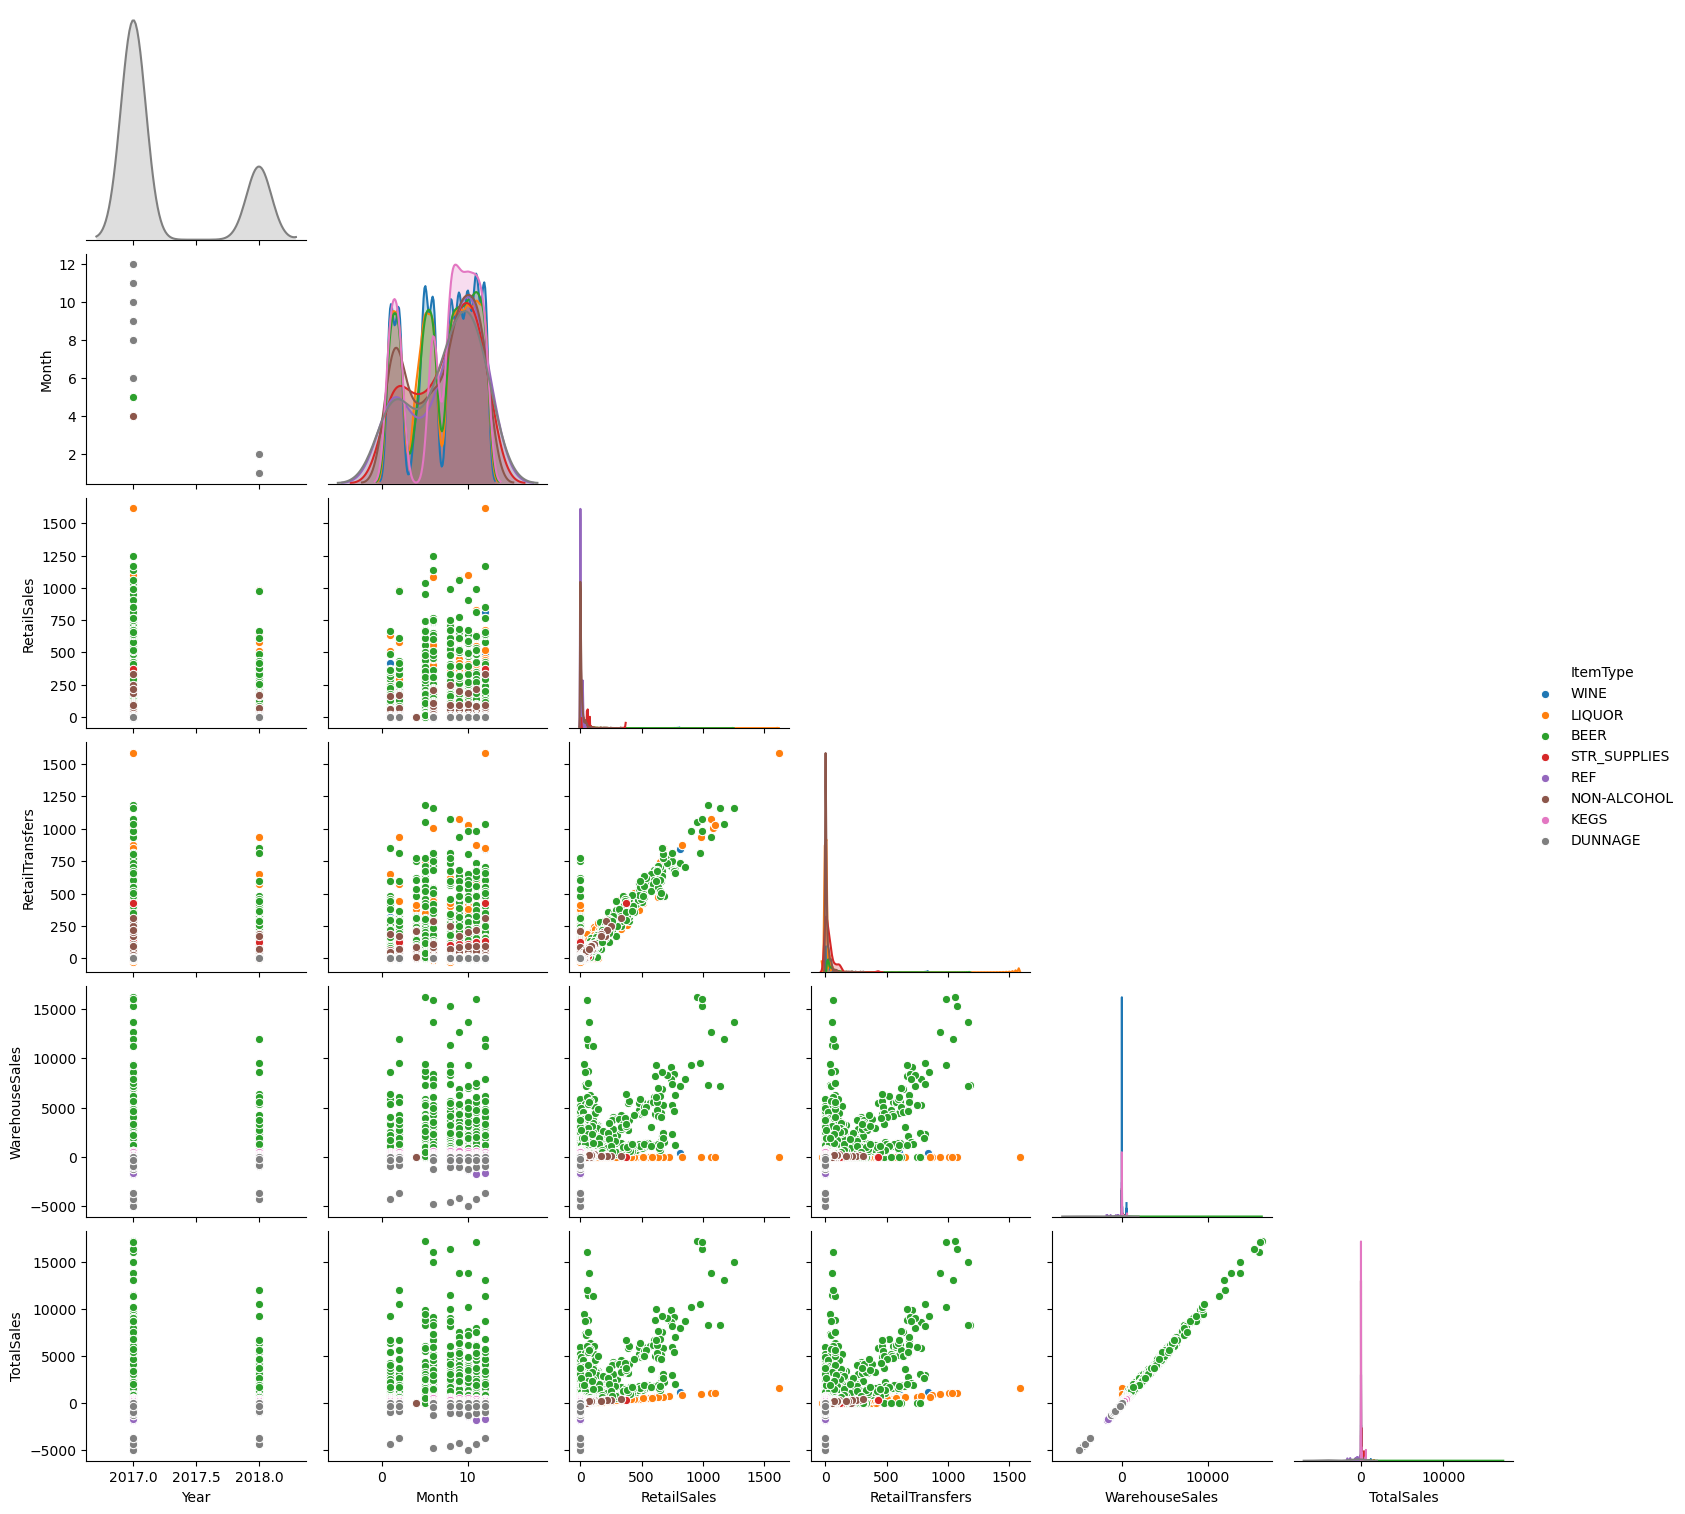

In [17]:
data_backup=data.copy()
data_backup = data_backup._get_numeric_data()
data_backup["ItemType"]=data["ItemType"]
plt.style.use("default")
sns.pairplot(data=data_backup,hue="ItemType",corner=True)